In [2]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt import BayesSearchCV
import pickle

In [3]:
cleaned_df=pd.read_csv('../../../training_data/variance_cleanup_features/variance_cleanup_selected_features.csv')
cleaned_df.set_index('url',inplace=True)

In [4]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [5]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [6]:
fc = SelectKBest(score_func=f_classif, k=20)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)
fc.fit(X_train,y_train)
X_train_selected=X_train.loc[:, fc.get_support()]
X_test_selected=X_test.loc[:, fc.get_support()]

In [7]:
X_train_selected

,https_true,url_hyphen_count,url_www_count,url_https_count,hostname_lenght,hostname_hyphen_count,hostname_digits_count,file_lenght,file_hyphen_count,html_hl_ratio_int,html_hl_ratio_ext,html_hl_ratio_null,html_hl_ratio_a_int,html_hl_ratio_a_ext,html_hl_ratio_a_null,html_hl_ratio_src_other_ext,html_hl_external_css,html_unsafe_anchor,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,
https://idorange57.wixsite.com/my-site,1,1,0,1,22,0,2,7,1,0.035714,0.964286,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0,4,1.0
https://betasus33.blogspot.com/,1,0,0,1,22,0,2,0,0,0.388889,0.611111,0.000000,0.142857,0.857143,0.000000,1.000000,0.0,1,5,0.0
http://13.78.215.193/banks/Tangerine/pin.php,0,0,0,0,13,0,10,7,0,0.911765,0.088235,0.000000,1.000000,0.000000,0.000000,0.250000,0.0,1,0,0.0
http://forestinhouse.com/wp-includes/Text/privmsg/pretraga.php/qer/enbpc/?addition=10gx1neq25mkx,0,1,0,0,17,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0,2,0.0
https://www.polskashoes.top/,1,0,1,1,19,0,0,0,0,0.970238,0.029762,0.000000,0.954955,0.045045,0.000000,0.000000,0.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://docs.google.com/forms/d/e/1FAIpQLSfgVWY26SZ_Aumb4Tj52fkdiZr979r97zbXoy45CT7ojbzUmQ/viewform,1,0,0,1,15,0,0,8,0,0.208333,0.791667,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0,10,0.0
http://yaadinc.com/labanquepostale/pst/cb257/index2.html,0,0,0,0,11,0,0,11,0,0.694444,0.027778,0.277778,0.032258,0.000000,0.967742,0.000000,1.0,1,0,0.0
https://www.starlingbank.com/,1,0,1,1,20,0,0,0,0,0.884444,0.088889,0.026667,0.855072,0.101449,0.043478,0.181818,1.0,1,5,1.0


[LibSVM]Accuracy: 0.9421666666666667
Recall: 0.9550787797519276


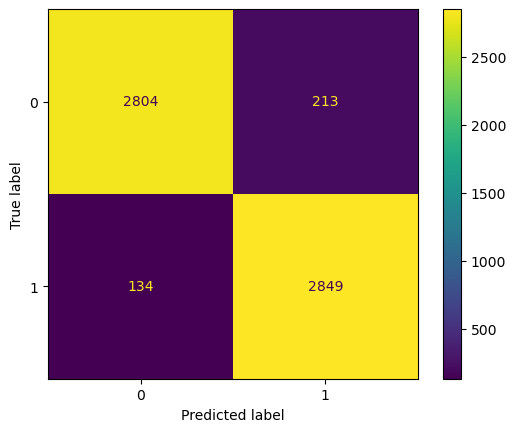

In [19]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
#displ.plot().sa('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")
plt.savefig('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")

In [21]:
params = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    #'degree': Integer(1,8),
    'kernel': Categorical(['linear', 'sigmoid', 'rbf']),
}

In [22]:
opt = BayesSearchCV(
    svm.SVC(),
    search_spaces=params,
    cv=4,
    scoring='accuracy',
    #random_state=42,
    n_iter=20,
    verbose=1,
)
np.int = int

In [23]:
opt.fit(X_train_selected,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fi

BayesSearchCV(cv=4, estimator=SVC(), n_iter=20, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'sigmoid', 'rbf'), prior=None)},
              verbose=1)

In [24]:
print(opt.best_score_)
print(opt.best_params_)

0.9592142857142857
OrderedDict([('C', 251154.72543937177), ('gamma', 0.00012714941185967683), ('kernel', 'rbf')])


[LibSVM]Accuracy: 0.9603333333333334
Recall: 0.9648005363727791


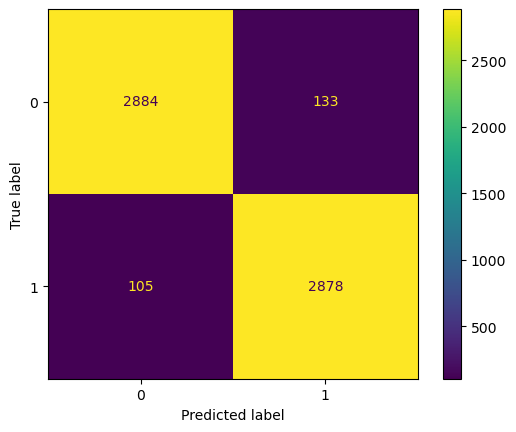

In [8]:
clf = svm.SVC(C=251154.72543937177,gamma=0.00012714941185967683,kernel='rbf',verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
#displ.plot().sa('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_before_tuning',dpi=300, bbox_inches = "tight")
plt.savefig('../../../images/hyperparameter_tuning/svm/SVM_confusion_matrix_after_tuning',dpi=300, bbox_inches = "tight")

In [15]:
pickle.dump(clf, open('../../saved_models/svm/svm_model_tuned.pkl', 'wb'))